In [2]:
%%capture
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path

from dotenv import load_dotenv
load_dotenv()

#%matplotlib inline
import hvplot

from MCForecastTools import MCSimulation
from pylab import rcParams

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

timeframe = "1D"

start_date = pd.Timestamp("2004-11-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-01", tz="America/New_York").isoformat()


tickers = ["SPY","DIA","QQQ","GLD","IEF"]

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index=df_ticker.index.date
df_ticker.head()

DIA                                      GLD                \
              open    high     low   close    volume   open   high    low   
2008-01-02  132.47  132.67  129.82  130.38  14555063  83.56  85.14  83.44   
2008-01-03  130.69  131.27  130.13  130.46   7867911  84.87  85.94  84.60   
2008-01-04  129.57  129.73   98.92   98.94  15489641  85.38  85.55  84.43   
2008-01-07   99.06  128.62   98.08  128.26  22119983  85.24  85.26  84.57   
2008-01-08  128.53  129.00   97.05   97.15  23484347  86.25  87.13  86.16   

                             ...    QQQ                                  \
            close    volume  ...   open   high    low  close     volume   
2008-01-02  84.84  11975400  ...  51.27  51.47  50.13  50.41  149569531   
2008-01-03  85.53   9079600  ...  50.39  50.76  50.15  50.43  104746815   
2008-01-04  85.11   7676100  ...  49.79  49.83  48.25  48.28  193237479   
2008-01-07  84.77   6331500  ...  48.41  48.68  47.43  48.17  220176338   
2008-01-08  86.77   8969400  ...  48.29  48.76  46.97  46.98  236721448   

               SPY                                     
              open    high     low   close     volume  
2008-01-02  146.53  146.99  143.88  144.55  175801806  
2008-01-03  144.92  145.49  144.12  144.46  111357758  
2008-01-04  143.34  143.44  140.92  140.93  195945264  
2008-01-07  141.81  142.23  140.10  141.46  220398905  
2008-01-08  142.10  142.90  138.63  138.81  303249870  

[5 rows x 25 columns]

In [6]:
df_closing_prices = pd.DataFrame()

df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
df_closing_prices["DIA"] = df_ticker["DIA"]["close"]
df_closing_prices["QQQ"] = df_ticker["QQQ"]["close"]
df_closing_prices["GLD"] = df_ticker["GLD"]["close"]
df_closing_prices["IEF"] = df_ticker["IEF"]["close"]


df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns.head()

,SPY,DIA,QQQ,GLD,IEF
2008-01-03,-0.000623,0.000614,0.000397,0.008133,0.001369
2008-01-04,-0.024436,-0.241607,-0.042633,-0.004911,0.002507
2008-01-07,0.003761,0.296341,-0.002278,-0.003995,0.002728
2008-01-08,-0.018733,-0.242554,-0.024704,0.023593,0.001813
2008-01-09,0.014192,0.008749,0.020434,-0.002651,-0.001584


In [7]:
df_daily_returns.describe()

,SPY,DIA,QQQ,GLD,IEF
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,0.000339,0.004237,0.000782,0.000292,0.000106
std,0.013159,0.090370,0.022970,0.011432,0.004258
min,-0.115916,-0.249346,-0.125748,-0.087751,-0.024658
25%,-0.004056,-0.010737,-0.005044,-0.005097,-0.002398
50%,0.000629,0.000808,0.001082,0.000493,0.000225
75%,0.005788,0.012469,0.007487,0.005906,0.002573
max,0.114968,0.433997,0.155200,0.115460,0.035144


<AxesSubplot:ylabel='Density'>

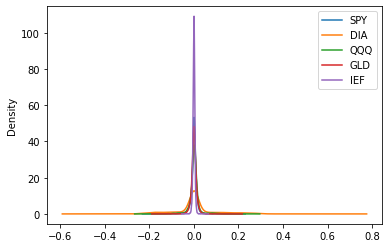

In [8]:
df_daily_returns.plot.density()

In [13]:
aggressive_weights = [0.25, 0.25, 0.25, 0.20, 0.05]
portfolio_returns_aggressive = df_daily_returns.dot(aggressive_weights)
moderate_weights = [0.16, 0.17, 0.17, 0.40, 0.10]
portfolio_returns_moderate = df_daily_returns.dot(moderate_weights)
conservative_weights = [0.083, 0.083, 0.084, .6, 0.15]
portfolio_returns_conservative = df_daily_returns.dot(conservative_weights)

cumulative_returns_aggressive = (1+portfolio_returns_aggressive).cumprod()
cumulative_returns_moderate = (1+portfolio_returns_moderate).cumprod()
cumulative_returns_conservative = (1+portfolio_returns_conservative).cumprod()

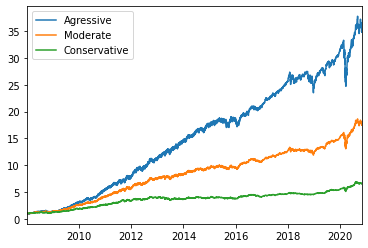

In [14]:
basePlot = cumulative_returns_aggressive.plot()
cumulative_returns_moderate.plot(ax=basePlot)
cumulative_returns_conservative.plot(ax=basePlot)
basePlot.legend(["Agressive",'Moderate',"Conservative"]);